**Problem Description:** In the assignment i implemented a Logistic Regression Model from scratch to predict diabetes among patients using the given Pima Indians Diabetes Dataset.The task includes data preprocessing, such as handling missing values and normalizing features, then followed by training the model. The model’s performance is evaluated with metrics like accuracy, precision, recall, F1-score, and ROC curve. A comparison with a scikit-learn implementation is made, and insights into performance differences are also discussed. Then the visualizations of the training process and evaluation results are also included.

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This import is used only for comparing LRM with Sci-Kit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

Loading in the 'Pima Indians Diabetes Dataset'

In [ ]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(data_url, header=None, names=columns)


Replacing the missing or invalid values with the mean of that column to ensure no data is lost. Only replacing the specific columns ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"] as they are the ones unlikely to have a value of 0.

In [ ]:
data_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in data_columns:
  data[c] = data[c].replace(0, data[c].mean())

Splitting data into features and labels.

In [ ]:
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

Standardizing the dataset. This ensures all features have the same scale.

In [ ]:
X_scaled = (X - X.mean()) / X.std()

Splitting the data into training and testing sets of 80% and 20%

In [ ]:
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)

X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Implementing the Logistic Regression Model including sigmoid function, loss function and gradient descent.
```gradient_descent ``` implements optimization algorithm. It updates weights and bias iteratively using the gradient of the loss function.
The Stopping criteria is based on fixed number of iterations.


Sigmoid function used:

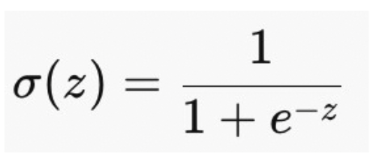

Loss Function:

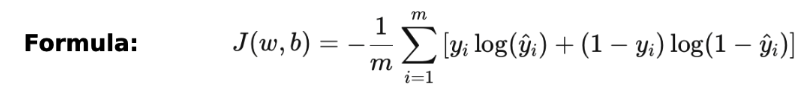

Calculated Gradient Descent using:

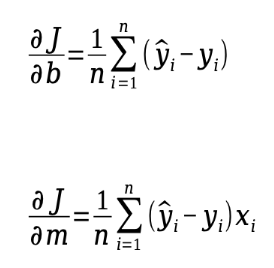

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient descent
def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights to zeros
    bias = 0  # Initialize bias to zero
    losses = []  # Store loss values over iterations

    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print loss every 100 iterations
        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')

    return weights, bias, losses



Training the model using ```gradient_descent``` function


In [ ]:
learning_rate = 0.01
num_iterations = 1000
weights, bias, losses = gradient_descent(X_train, y_train, learning_rate, num_iterations)

Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.5899162664164602
Iteration 200, Loss: 0.5441286375943185
Iteration 300, Loss: 0.5195907526117234
Iteration 400, Loss: 0.5045507268577015
Iteration 500, Loss: 0.49447168260059293
Iteration 600, Loss: 0.4872979995160435
Iteration 700, Loss: 0.4819739712380499
Iteration 800, Loss: 0.47790215607233183
Iteration 900, Loss: 0.4747178582363512


For Evaluating, below is the prediction function defined

In [ ]:
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

Now the ```predict``` function is used to make predictions and calculate evaluation metrics.



In [ ]:
# Make predictions
y_pred = predict(X_test, weights, bias)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7727272727272727
Precision: 0.7272727272727273
Recall: 0.5818181818181818
F1 Score: 0.6464646464646465


Generating confusion Matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[87 12]
 [23 32]]


Plotting the ROC curve

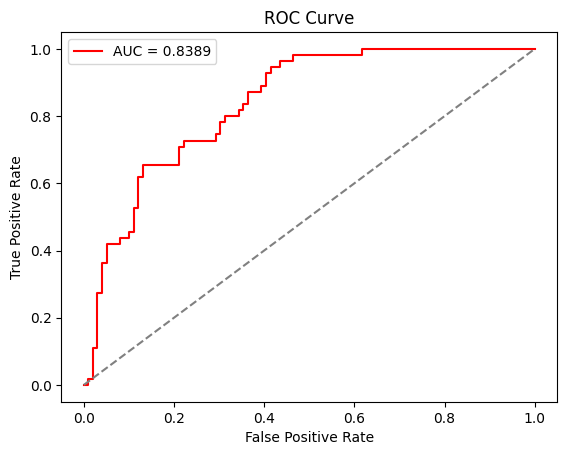

In [ ]:

y_scores = np.dot(X_test, weights) + bias  # Compute scores using weights and bias
fpr, tpr, _ = roc_curve(y_test, y_scores)  # Calculate FPR and TPR
roc_auc = auc(fpr, tpr)  # Calculate AUC

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='red')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Generating calculation metrice for Scikit-learn Logistic Regression and plotting ROC curve for it.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train scikit-learn model
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# Evaluate scikit-learn model
sklearn_y_scores = sklearn_model.predict_proba(X_test)[:, 1]  # Probability scores
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, sklearn_y_scores)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print(f'Scikit-learn Accuracy: {accuracy_sklearn}')
print(f'Scikit-learn Precision: {precision_sklearn}')
print(f'Scikit-learn Recall: {recall_sklearn}')
print(f'Scikit-learn F1 Score: {f1_sklearn}')

Scikit-learn Accuracy: 0.7662337662337663
Scikit-learn Precision: 0.7435897435897436
Scikit-learn Recall: 0.5272727272727272
Scikit-learn F1 Score: 0.6170212765957447


Comparing our LRM with model implemented with Scikit-learn.
I added ROC curve for both of them below for better visualization

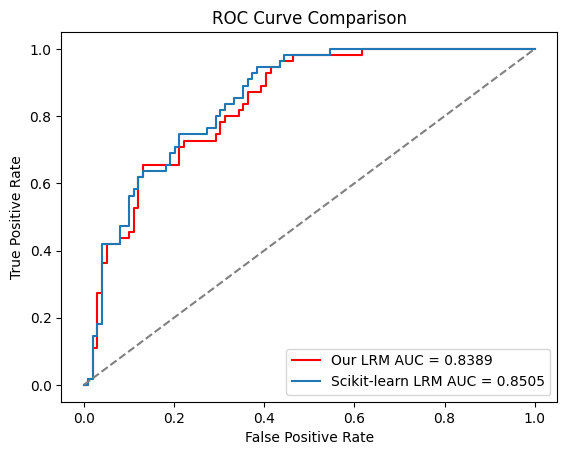

In [ ]:
plt.plot(fpr, tpr, label=f'Our LRM AUC = {roc_auc:.4f}',color='red')
plt.plot(fpr_sklearn, tpr_sklearn, label=f'Scikit-learn LRM AUC = {roc_auc_sklearn:.4f}')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**On comparing both the models, it can be analyse that:**

*   **Accuracy**: Both models are close (77.27% vs. 76.62%), indicating similar overall performance.
*   **Precision**: Scikit-learn’s model has slightly better precision at 74.36% while mine LRM had 72.73%, meaning it’s more reliable in predicting positive cases.
*   **Recall**: Scikit' model had recall of 52.73% while mine had 58.18%, indicating it’s better at identifying positive instances, but may have more false positives.
*   **F1 Score**: My model had a higher F1 score at 64.65% vs 61.70% of Scikit's model, suggesting a , suggesting better balance between precision and recall.
*   **AUC**: Skikit's model had higher AUC at 0.8505 while mine had 0.8389 implying the prior had better performance.


**Insights:**

Viewing both models, it can be seen that both the models perform similarly so it does indicate that my built LRM can be practically useful considering if there' s for more tailored optimization is needed. It is also good for educational purposes as well as it gives insight to the inner workings of the model and more preferrable for research purposes. While Scikit's model is to be more robust and optimised choice for general choice.



Visualizing the Training Process by plotting Loss VS Iterations

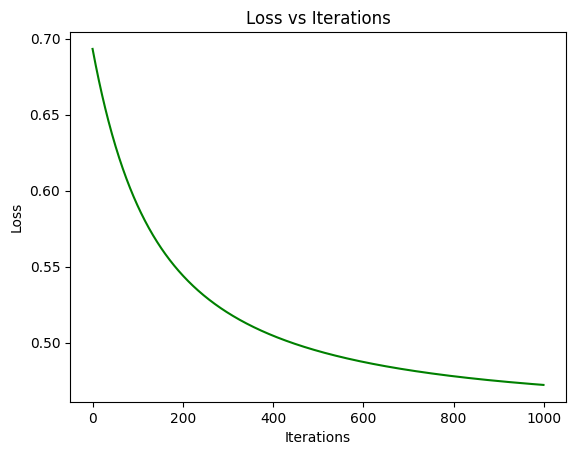

In [ ]:
# Plot loss vs iterations
plt.plot(losses, color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

This method takes feature values from the user and predicts the presence of diabetes.

In [ ]:
def predict_user_input():
    user_input = []
    feature_names = ["Pregnancies", "Glucose", "Blood Pressure", "Skin Thickness",
                     "Insulin", "BMI", "Diabetes Pedigree Function", "Age"]

    for feature in feature_names:
        value = float(input(f"Enter {feature}: "))
        user_input.append(value)

    input_values = np.array([user_input])
    input_scaled = (input_values - X.mean().values) / X.std().values
    prediction = predict(input_scaled, weights, bias)

    result = "Patient has Diabetes" if prediction[0] == 1 else "No Diabetes present in patient"
    print(f'Prediction: {result}')

predict_user_input()


Enter Pregnancies: 3
Enter Glucose: 120
Enter Blood Pressure: 70
Enter Skin Thickness: 25
Enter Insulin: 90
Enter BMI: 32
Enter Diabetes Pedigree Function: 0.5
Enter Age: 45
Prediction: No Diabetes present in patient
